In [2]:
#import libraries
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split #To preprocess data
#Load the data
iris = sklearn.datasets.load_iris() # Load the dataset once
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Assign the data and feature names to df
# You can optionally create DataFrames for target and target names as well,
# but they are not assigned to df in this case.
target_df = pd.DataFrame(iris.target, columns=['target'])
target_names_df = pd.DataFrame(iris.target_names, columns=['target_names'])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


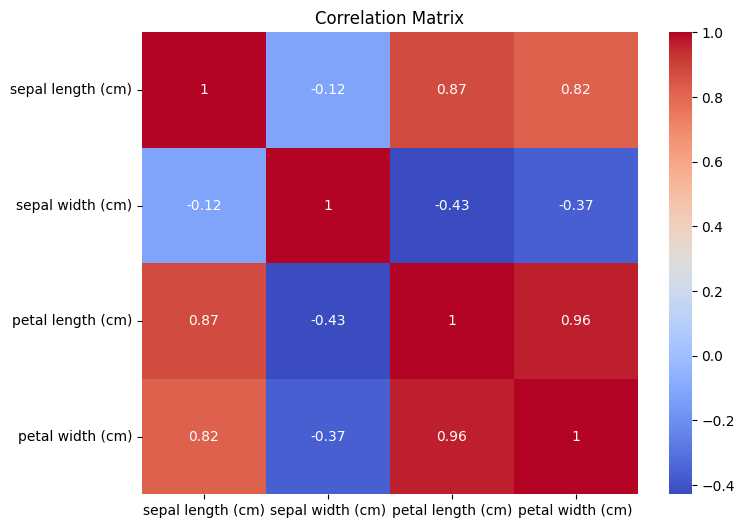

In [15]:
# %%
plt.figure(figsize=(8,6))
# Pass the correlation matrix 'corr' directly to sns.heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

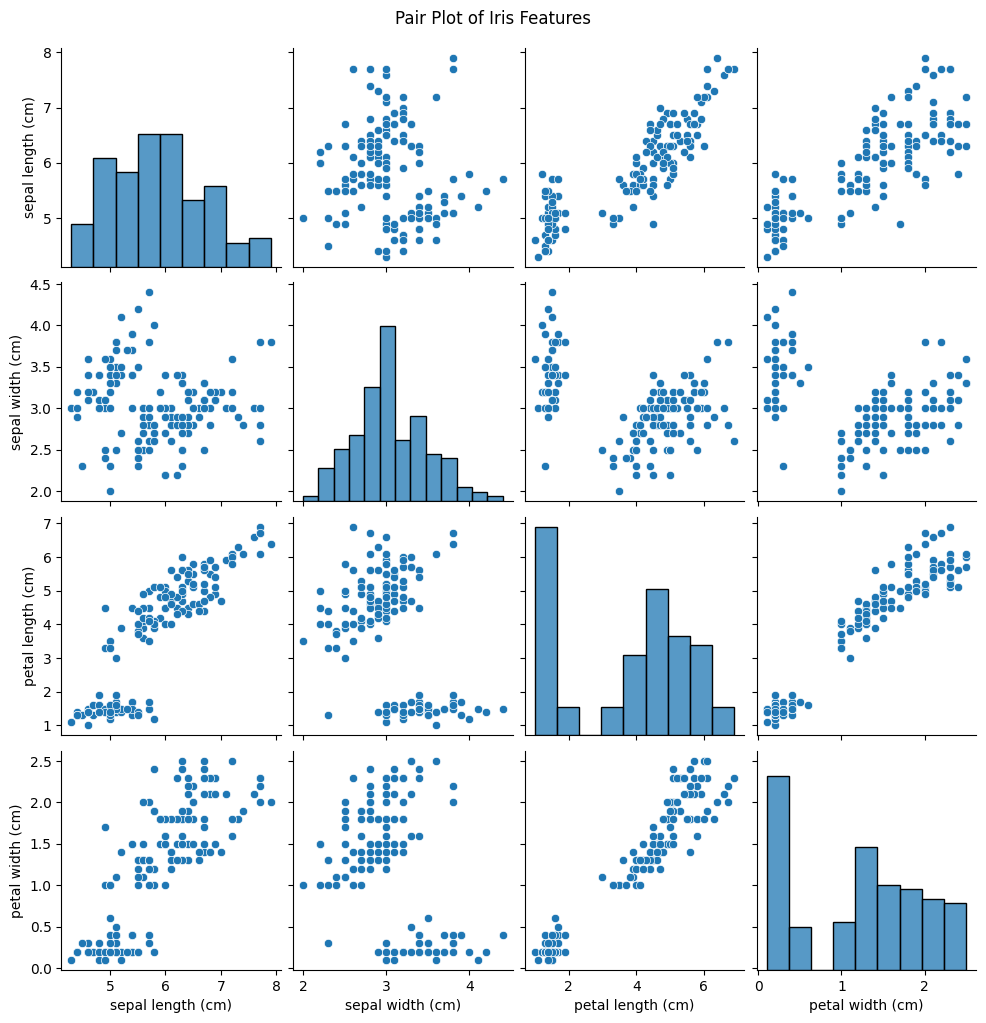

In [16]:
# Generate a pair plot to visualize relationships between features
sns.pairplot(df)
plt.suptitle("Pair Plot of Iris Features", y=1.02) # Add a title to the pair plot
plt.show()

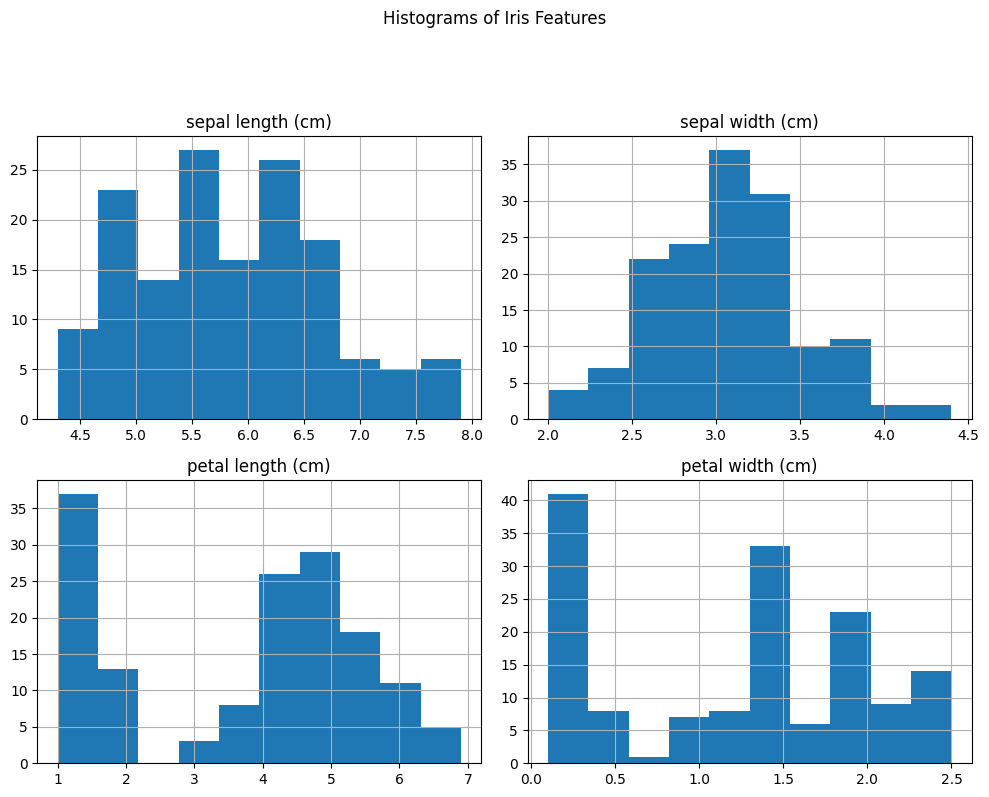

In [17]:
# Alternatively, plot histograms for each feature
df.hist(figsize=(10, 8)) # Creates histograms for all numerical columns
plt.suptitle("Histograms of Iris Features", y=1.02) # Add a title to the overall figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [18]:
#Preprocess the data
# Combine the features (df) and the target variable (target_df) for splitting
# Alternatively, you can keep them separate and pass both to train_test_split
# X = df # Features
# y = target_df['target'] # Target variable (as a Series or array)

# Assuming you want to split the features (df) and the target (target_df) together
from sklearn.model_selection import train_test_split

# Concatenate features and target for a single split operation
data = pd.concat([df, target_df], axis=1)

# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added test_size and random_state

# You can then print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN model
# Initialize the KNeighborsClassifier with a suitable number of neighbors (e.g., n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the species for the test data
y_pred = knn.predict(X_test)

# You can now view the predictions and compare them to the actual test labels (y_test)
print("Predictions for the test data:", y_pred)
print("Actual species for the test data:", y_test.values)

Predictions for the test data: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual species for the test data: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Accuracy Score: 1.0


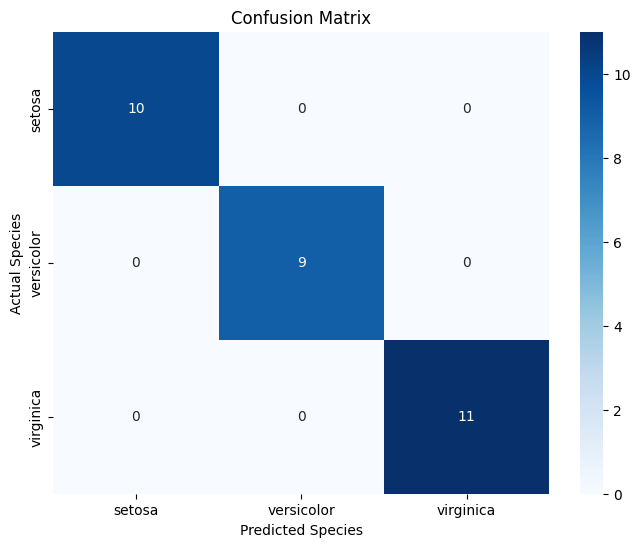

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix')
plt.show()

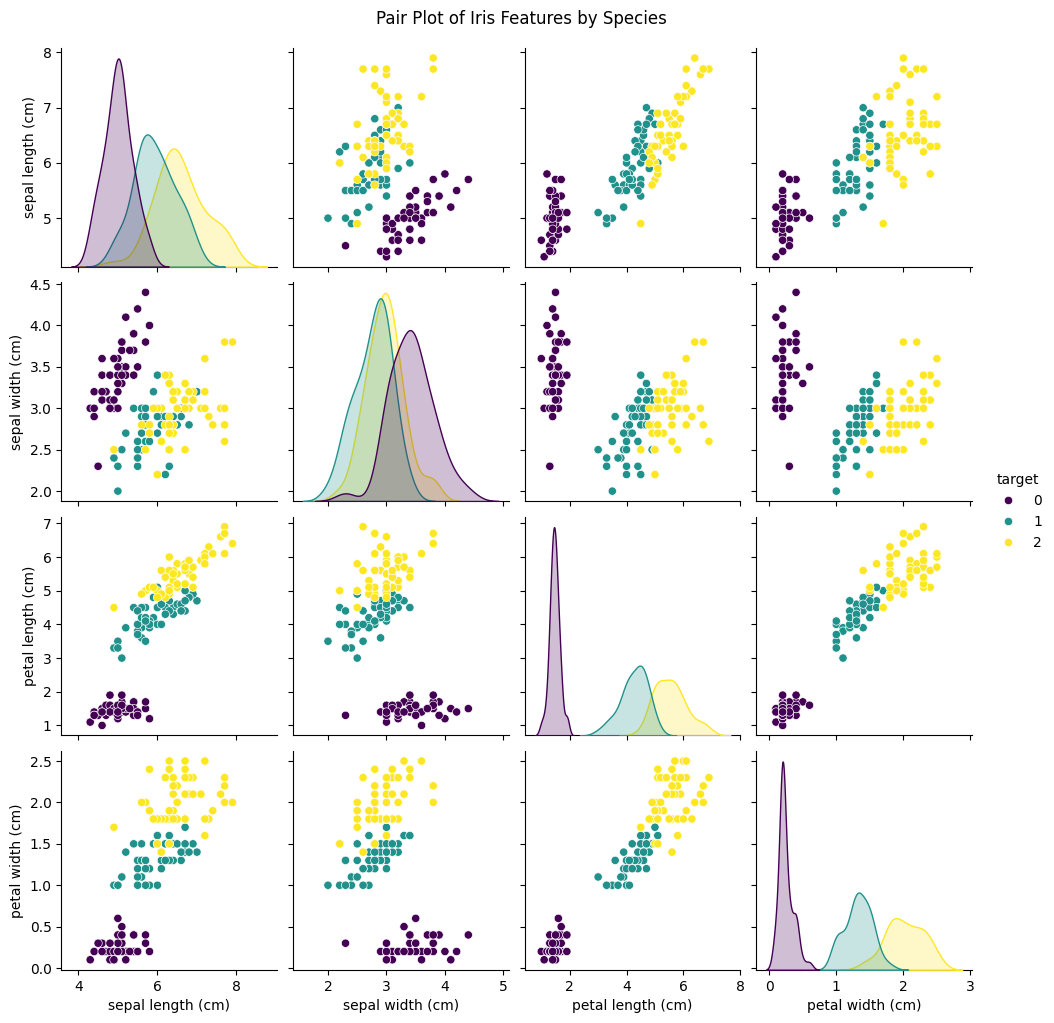

In [25]:
# Visualize how different species are grouped using seaborn's pairplot with hue
sns.pairplot(data, hue='target', palette='viridis')
plt.suptitle("Pair Plot of Iris Features by Species", y=1.02) # Add a title to the pair plot
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 Score (macro averaging for multi-class)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro): {f1}")

# Calculate Precision (macro averaging for multi-class)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision}")

# Calculate Recall (Sensitivity) (macro averaging for multi-class)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Sensitivity) (Macro): {recall}")

# Calculate Specificity for each class and then average (macro)
# Specificity for a class i is calculated as True Negatives / (True Negatives + False Positives)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity_scores = []
for i in range(conf_matrix.shape[0]):
    tn = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(conf_matrix[:, i], i))
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    specificity_scores.append(specificity)

specificity = np.mean(specificity_scores)
print(f"Specificity (Macro): {specificity}")

Accuracy: 1.0
F1 Score (Macro): 1.0
Precision (Macro): 1.0
Recall (Sensitivity) (Macro): 1.0
Specificity (Macro): 1.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of different k values to try
k_values = [1, 3, 5, 7, 9, 11]

# Dictionary to store accuracy for each k value
accuracy_scores = {}

for k in k_values:
    # Initialize and train the KNN model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy

    print(f"Accuracy for k={k}: {accuracy}")

# Find the k with the highest accuracy
best_k = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest k value for highest accuracy: {best_k}")


Accuracy for k=1: 1.0
Accuracy for k=3: 1.0
Accuracy for k=5: 1.0
Accuracy for k=7: 0.9666666666666667
Accuracy for k=9: 1.0
Accuracy for k=11: 1.0

Best k value for highest accuracy: 1
